In [18]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeanseans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Integration between seaborn and matplotlib
sns.set()

In [3]:
# Import data
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
# Explore data
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


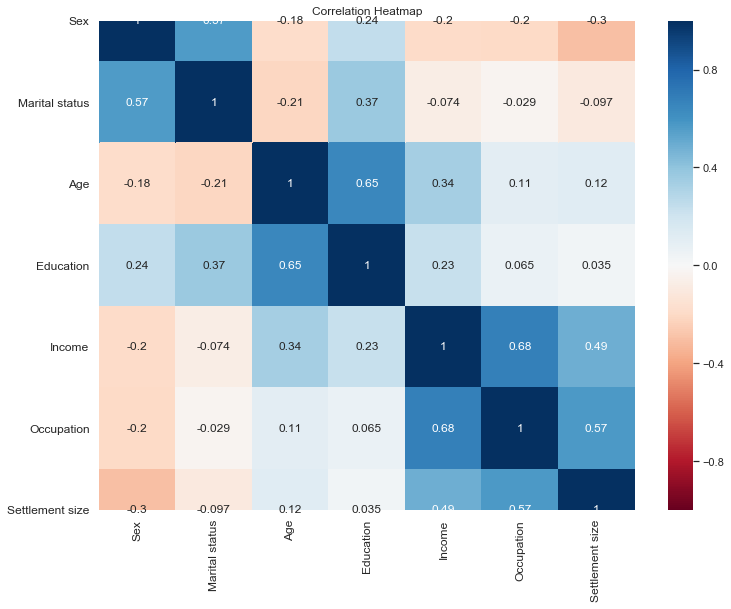

In [5]:
# Correlation estimate (Pearson Correlation - default in Python)

plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Raw Data Visualization')

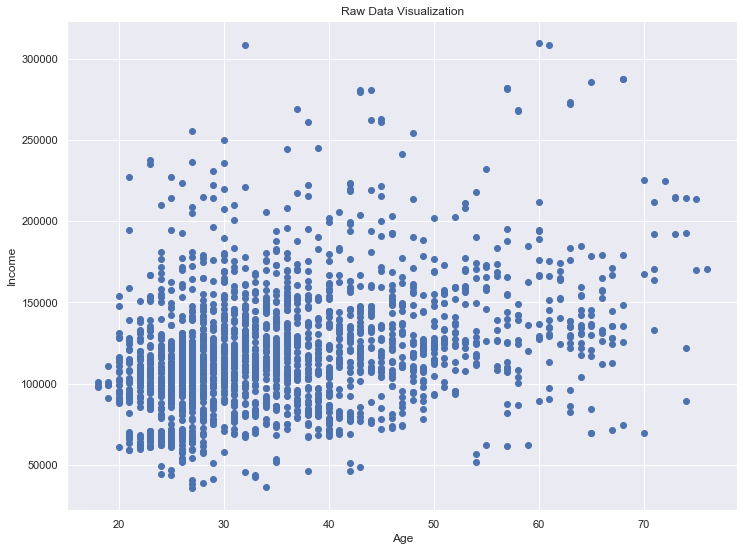

In [6]:
# Visualize Raw Data
# Data from column 2 "Age", and column 4 "Income"

plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Raw Data Visualization')

## Standardization
Standardizing data, so that all features have equal weight. This is important for modelling. Otherwise, in our case Income would be considered much more important than Education for Instance. 

This is what is also refered to as bias.

In [7]:
# Standardization
# Output: input is an array and has been converted to float
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Clustering

### Types of clustering:
- hierarchical (tree) eg. Animal kingdom
- flat (circles)

### How to measure the distances between observations:
- Euclidean distance (c in triangle)
- Manhattan distance (a,b in triangle)
- Maximum distance (distance on X axis)


To define clusters find a horizontal line on the dendrogram on which to cut.
Rule of thumb: find the longest vertical line unintercepted by a horizontal line from the dendrogram. This is where you should make the cut.

Hierarchical clustering may take even hours with the big dataset. But it's advantage is that it can find the number of clusters.

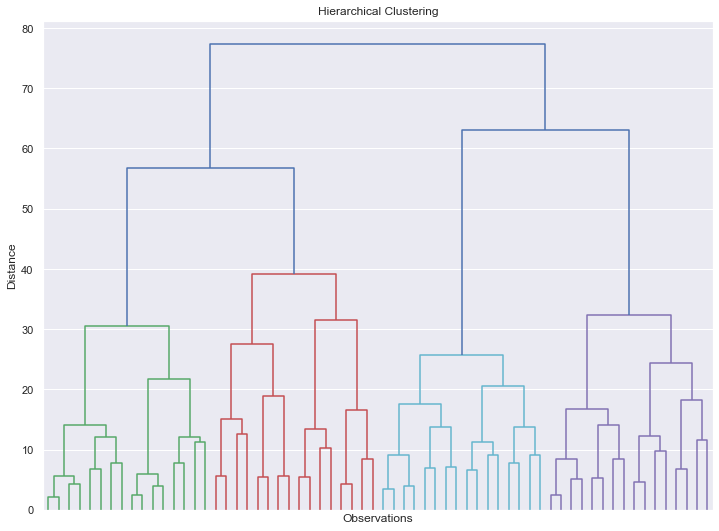

In [13]:
# Hierarchical Clustering

#output: a linkage matrix
hier_clust = linkage(segmentation_std, method= 'ward')

# Dendrogram: tree-like, hierarchical representation of points
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
#            color_threshold = 0)
plt.show()

### K-means clustering

1. Choose number of clusters (K = the number of clusters)
2. Specify cluster seeds (starting centroid)
3. Calculate the centroid or the geometrical center

Issues: the squared Euclidean distance is quite sensitive to outliers. To solve that problem use: K-median clustering

In [34]:
# Within Cluster Sum of Squares 
wcss = []
for i in range(1,11):
    # Run the algortihm at many different starting points - k means plus plus.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

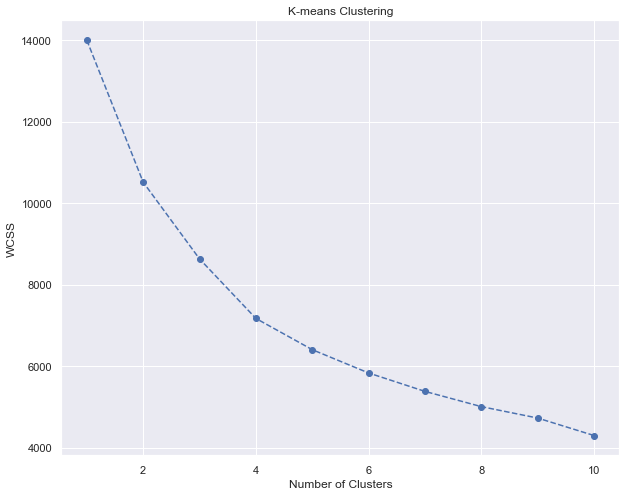

In [35]:
# Plot the Within Cluster Sum of Squares for the different number of clusters. 
# Depending on the shape of this graph, make a decision about the number of clusters using Elbow method
plt.figure(figsize = (10, 8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [36]:
# Run K-means with a fixed number of clusters = 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [37]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [38]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [39]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [40]:
# Change names of the 'Segment K-means'
df_segm_analysis.rename({0: 'well-off',
                         1: 'fewer-opportunities',
                         2: 'standard',
                         3: 'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


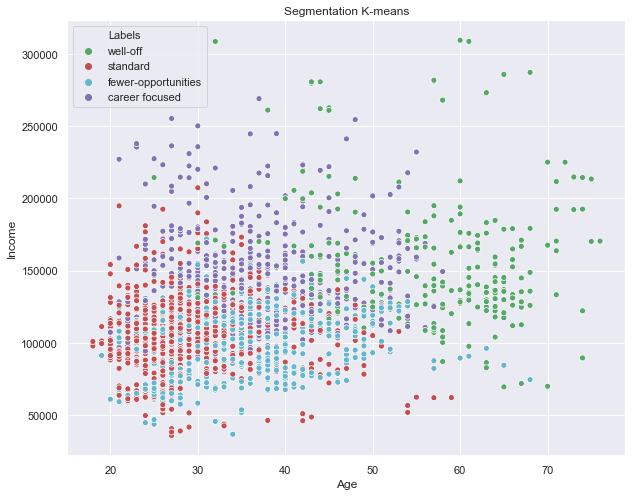

In [47]:
# Plot the results from the K-means algorithm. 
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0: 'well-off',
                                                                  1: 'fewer-opportunities',
                                                                  2: 'standard',
                                                                  3: 'career focused'})

x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()